In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'C:/Users/gvats/Desktop/Stout/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(data)

In [3]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1154458,131,PAYMENT,13959.95,C363606290,0.00,0.00,M1072930972,0.00,0.00,0,0
2622003,208,CASH_OUT,382271.15,C62572801,22921.00,0.00,C2114853918,3332104.53,3714375.68,0,0
4175542,304,CASH_IN,97337.49,C867209244,5744411.82,5841749.31,C1572500682,11901652.61,11696677.39,0,0
4689625,331,CASH_OUT,40259.99,C1411637156,0.00,0.00,C1858850178,582327.37,622587.36,0,0
5094112,355,PAYMENT,11841.92,C1373466425,0.00,0.00,M1956566178,0.00,0.00,0,0
3580462,261,CASH_OUT,15226.38,C750922601,0.00,0.00,C1618215235,1393794.86,1409021.24,0,0
3966560,297,CASH_IN,18706.25,C675485956,97417.00,116123.25,C1164240762,0.00,0.00,0,0
1674343,158,CASH_OUT,215476.22,C1601918191,69608.00,0.00,C417748582,0.00,215476.22,0,0
3957087,288,PAYMENT,2391.47,C2035903597,917.02,0.00,M1230022578,0.00,0.00,0,0
3946558,286,CASH_OUT,6338.73,C2072607029,0.00,0.00,C1888121977,163563.73,169902.46,0,0


In [4]:
# Checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

From the above information we know that there are no Null Values.

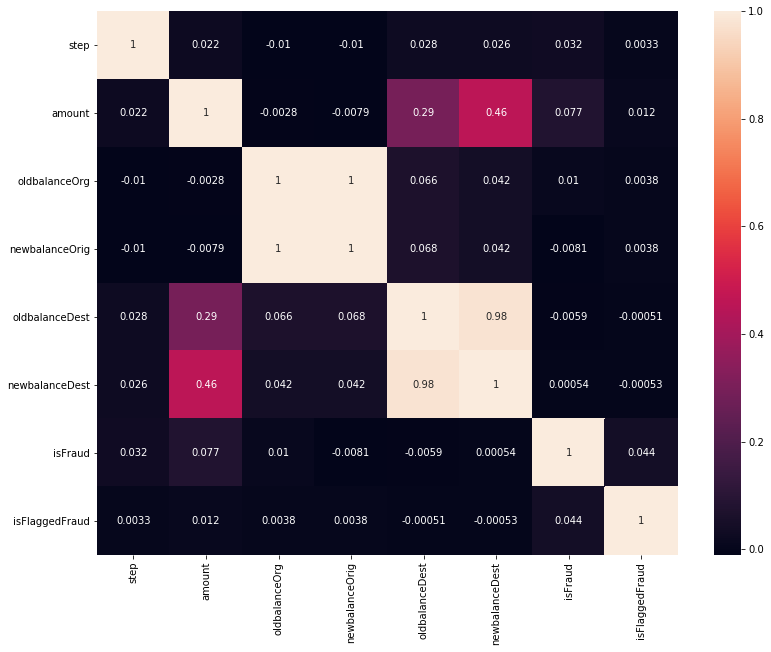

In [5]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True);

In [40]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


As we see from the above table that fraud happens only if the type is 'Cash_out' or 'Transfer'. 


0    6354407
1       8213
Name: isFraud, dtype: int64


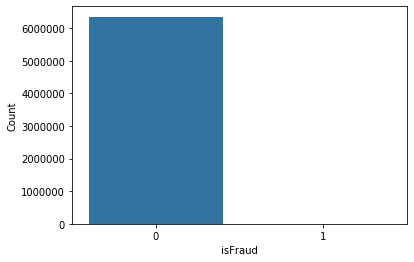

In [6]:
# count number of fraud and not fraud data
print(df.isFraud.value_counts())
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

Above bar chart, number of fraud is 8213

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


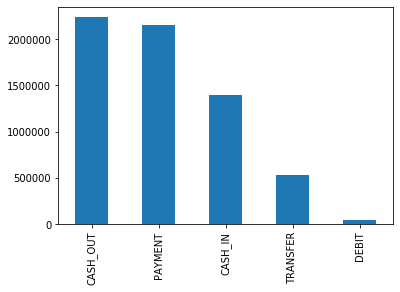

In [12]:
# Count number of data point in each type of transaction
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

In [17]:
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [41]:
#Groupby type
#df.groupby('type')['isFraud','isFlaggedFraud'].sum()

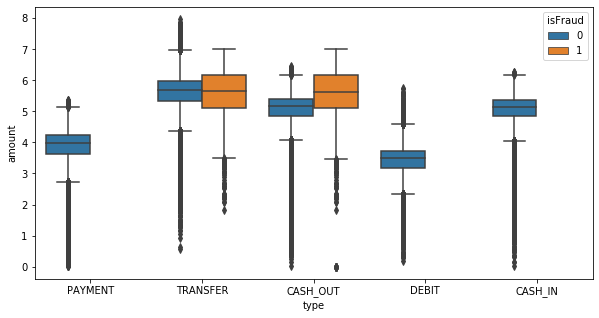

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y=np.log10(df['amount'] + 1), hue='isFraud', data=df);

From the above boxplot, we can see most number of fraud look place while "Tranfer" and "Cash out".

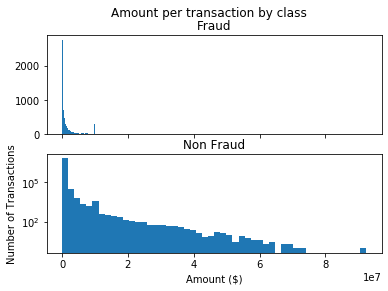

In [27]:
# Amount Vs number of transaction
fraud = df[df['isFraud']==1]
normal = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

From the about graph, there are less number of transaction amount in fraud compared to non fraud data

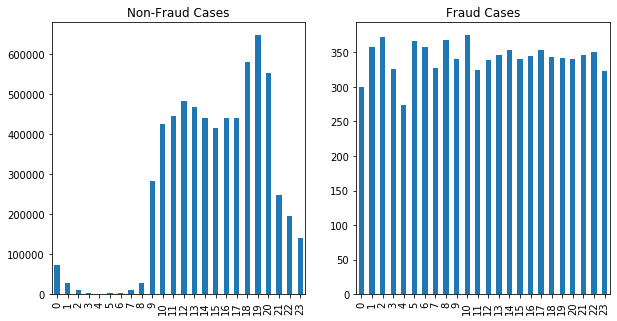

In [28]:
df['hour'] = df['step'].apply(lambda x: x % 24)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df['hour'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
df[df['isFraud']==1]['hour'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[0].set_title('Non-Fraud Cases')
ax[1].set_title('Fraud Cases');

From the above graph we see that most number of fraud take place during the night time maybe because of different time zone.

In [29]:
#importing packages
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score, f1_score,confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
droplist=['isFlaggedFraud','type','nameDest','nameOrig']

Removed the 'isFlaggedFraud','type','nameDest','nameOrig' from our data set for taking main features.

In [31]:
data=df
MLData=data.drop(labels=droplist,axis=1)
X=MLData.drop('isFraud',1)
Y=MLData.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42, shuffle=False)

the key feature of our dataset is isFraud, and the dividing the dataset in to training and testing 70%-30% respectively.

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using standardScalar to remove the mean and scaling to unit variance

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[1862633   41583]
 [    828    3742]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1904216
           1       0.08      0.82      0.15      4570

    accuracy                           0.98   1908786
   macro avg       0.54      0.90      0.57   1908786
weighted avg       1.00      0.98      0.99   1908786



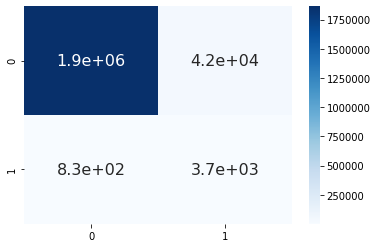

In [34]:
pred_y = clf.predict(X_test)
print(confusion_matrix(y_test, pred_y))
dfc = confusion_matrix(y_test, pred_y)
print(classification_report(y_test, pred_y))
accuracy_score(y_test, pred_y)
sns.heatmap(dfc, cmap="Blues", annot=True,annot_kws={"size": 16})

In [35]:
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier()
r_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[1890726   13490]
 [   1157    3413]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1904216
           1       0.20      0.75      0.32      4570

    accuracy                           0.99   1908786
   macro avg       0.60      0.87      0.66   1908786
weighted avg       1.00      0.99      0.99   1908786



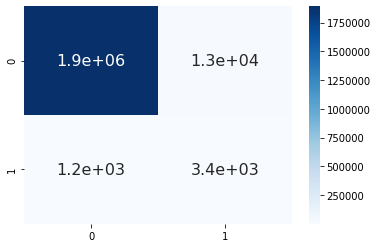

In [36]:
pred_y_r = r_clf.predict(X_test)
print(confusion_matrix(y_test, pred_y_r))
rfc = confusion_matrix(y_test, pred_y_r)
print(classification_report(y_test, pred_y_r))
accuracy_score(y_test, pred_y_r)
sns.heatmap(rfc, cmap="Blues", annot=True,annot_kws={"size": 16})

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[1904210       6]
 [   2841    1729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904216
           1       1.00      0.38      0.55      4570

    accuracy                           1.00   1908786
   macro avg       1.00      0.69      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786



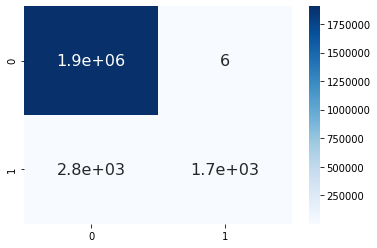

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn
import matplotlib.pyplot as plt
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [43]:
print('Decision tree',accuracy_score(y_test, pred_y))
print('Random Forest',accuracy_score(y_test, pred_y_r))
print('Logistic regression',accuracy_score(y_test, y_pred))


Decision tree 0.9777811656204519
Random Forest 0.992326536342995
Logistic regression 0.9985084760680348


Among all these alogrithm techniques, Logistic regression gave the highest accuracy because logistic regression is binary depended variable which is perfect model for this dataset where dataset implies of there is Fraud or no Fraud.

There are few more efficient models like XGBoost etc. 

Maximum number of fraud took place through tranfer and cash out so bank must be informed to track the the fraudulent from verifying the customers. 